In [5]:
import pandas as pd
import matplotlib as plt

In [6]:
d_parser = lambda x:pd.to_datetime(x, errors='coerce')

In [7]:
df = pd.read_csv('breach_report.csv', encoding= 'latin1', 
                 dtype={'Type of Breach':'string'},
                 parse_dates=['Breach Submission Date'], date_parser=d_parser)

In [8]:
df.head(5)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,2009-10-21,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,2009-10-28,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,2009-11-17,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,2009-11-20,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [9]:
df.dtypes

Name of Covered Entity                      object
State                                       object
Covered Entity Type                         object
Individuals Affected                       float64
Breach Submission Date              datetime64[ns]
Type of Breach                              string
Location of Breached Information            object
Business Associate Present                  object
Web Description                             object
dtype: object

In [10]:
df.shape

(1700, 9)

In [11]:
df1 = df.loc[(df['Breach Submission Date'] <= '2013-09-30')]

In [12]:
#df1.groupby(df1['Breach Submission Date'])[['Breach Submission Date']].sum()

In [13]:
df1.isna().sum(axis = 0)

Name of Covered Entity               0
State                                6
Covered Entity Type                 23
Individuals Affected                14
Breach Submission Date               0
Type of Breach                      10
Location of Breached Information     7
Business Associate Present           0
Web Description                     11
dtype: int64

In [14]:
round(df1.isna().sum() * 100/len(df),2)

Name of Covered Entity              0.00
State                               0.35
Covered Entity Type                 1.35
Individuals Affected                0.82
Breach Submission Date              0.00
Type of Breach                      0.59
Location of Breached Information    0.41
Business Associate Present          0.00
Web Description                     0.65
dtype: float64

In [15]:
df1 = df1.dropna(subset = ['State','Covered Entity Type','Individuals Affected','Type of Breach','Location of Breached Information', 'Web Description'])

In [16]:
round(df1.isna().sum() * 100/len(df1),2)

Name of Covered Entity              0.0
State                               0.0
Covered Entity Type                 0.0
Individuals Affected                0.0
Breach Submission Date              0.0
Type of Breach                      0.0
Location of Breached Information    0.0
Business Associate Present          0.0
Web Description                     0.0
dtype: float64

In [17]:
df1.groupby(['Type of Breach']).sum()

,Individuals Affected
Type of Breach,
Hacking/IT Incident,1231391.0
"Hacking/IT Incident, Other",3200.0
"Hacking/IT Incident, Other, Unauthorized Access/Disclosure",4354.0
"Hacking/IT Incident, Theft",27800.0
"Hacking/IT Incident, Theft, Unauthorized Access/Disclosure",13800.0
"Hacking/IT Incident, Unauthorized Access/Disclosure",62487.0
Improper Disposal,620927.0
"Improper Disposal, Loss",3430.0
"Improper Disposal, Loss, Theft",1950.0


In [18]:
for x in df1['Type of Breach']:
  if 'Hacking/IT Incident' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Hacking/IT Incident'
    continue
  if 'Improper Disposal' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Improper Disposal'
    continue
  if 'Loss' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Loss'
    continue
  if 'Unauthorized Access/Disclosure' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Unauthorized Access/Disclosure'
    continue
  if 'Theft' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Theft'
    continue
  if 'Unknown' in x or 'Other' in x:
    df1.loc[df1['Type of Breach'] == x,'Breach Type'] = 'Other/Unkown'
    continue

In [19]:
df1.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Breach Type
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,2009-10-21,Theft,Paper/Films,No,A binder containing the protected health infor...,Theft
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,2009-10-28,Theft,Network Server,No,Five desktop computers containing unencrypted ...,Theft
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,\N,Theft
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,2009-11-17,Loss,Laptop,No,A laptop was lost by an employee while in tran...,Loss
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,2009-11-20,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,Theft


In [20]:
df1.groupby(['Breach Type']).sum()

,Individuals Affected
Breach Type,
Hacking/IT Incident,1343032.0
Improper Disposal,644108.0
Loss,7101794.0
Other/Unkown,2781311.0
Theft,13852804.0
Unauthorized Access/Disclosure,936979.0


In [21]:
df1['Location of Breached Information'].value_counts()

Paper/Films                                                                                                                         174
Laptop                                                                                                                              166
Other                                                                                                                                85
Desktop Computer                                                                                                                     82
Network Server                                                                                                                       67
Other, Other Portable Electronic Device                                                                                              43
Other Portable Electronic Device                                                                                                     37
Email                                           

In [25]:
for x in df1['Location of Breached Information']:
  if 'Desktop Computer' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Desktop Computers'
    continue
  if 'Electronic Medical Record' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Electronic health records'
    continue
  if 'Email' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'E-mail'
    continue
  if 'Laptop' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Laptops'
    continue
  if 'Network Server' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Network Servers'
    continue
  if 'Other' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Others'
  if 'Paper' in x:
    df1.loc[df1['Location of Breached Information'] == x,'Location'] = 'Paper'
    continue

In [27]:
df1.groupby(['Location']).sum()

,Individuals Affected
Location,
Desktop Computers,6610269.0
E-mail,333546.0
Electronic health records,2693049.0
Laptops,2693433.0
Network Servers,1878306.0
Others,11320147.0
Paper,1131278.0


In [29]:
df1['Business Associate Present'].value_counts()

No     596
Yes    166
Name: Business Associate Present, dtype: int64

In [30]:
df1['Business Associate Present'] = df1['Business Associate Present'].map({'Yes':1, 'No':0})

In [31]:
df1['Business Associate Present'].value_counts()

0    596
1    166
Name: Business Associate Present, dtype: int64

In [32]:
df1.groupby(['Location']).sum()

,Individuals Affected,Business Associate Present
Location,,
Desktop Computers,6610269.0,12
E-mail,333546.0,2
Electronic health records,2693049.0,3
Laptops,2693433.0,28
Network Servers,1878306.0,24
Others,11320147.0,51
Paper,1131278.0,46


In [40]:
for x in df1['Covered Entity Type']:
  if x:
    df1.loc[df1['Covered Entity Type'] == x,'Covered Entities Involved'] = 1
  else:
    df1.loc[df1['Covered Entity Type'] == x,'Covered Entities Involved'] = 0

In [43]:
df1.groupby(['Breach Type']).sum()

,Individuals Affected,Business Associate Present,Covered Entities Involved
Breach Type,,,
Hacking/IT Incident,1343032.0,13,52.0
Improper Disposal,644108.0,9,35.0
Loss,7101794.0,15,68.0
Other/Unkown,2781311.0,17,59.0
Theft,13852804.0,78,442.0
Unauthorized Access/Disclosure,936979.0,34,106.0


In [42]:
df1.groupby(['Location']).sum()

,Individuals Affected,Business Associate Present,Covered Entities Involved
Location,,,
Desktop Computers,6610269.0,12,117.0
E-mail,333546.0,2,27.0
Electronic health records,2693049.0,3,25.0
Laptops,2693433.0,28,180.0
Network Servers,1878306.0,24,69.0
Others,11320147.0,51,165.0
Paper,1131278.0,46,179.0


In [44]:
df1.groupby(['State']).sum()

,Individuals Affected,Business Associate Present,Covered Entities Involved
State,,,
AK,6944.0,2,4.0
AL,986990.0,1,8.0
AR,19383.0,1,7.0
AZ,141116.0,2,19.0
CA,1287835.0,17,82.0
CO,125169.0,2,10.0
CT,202536.0,5,15.0
DC,11705.0,1,5.0
FL,2792774.0,1,50.0


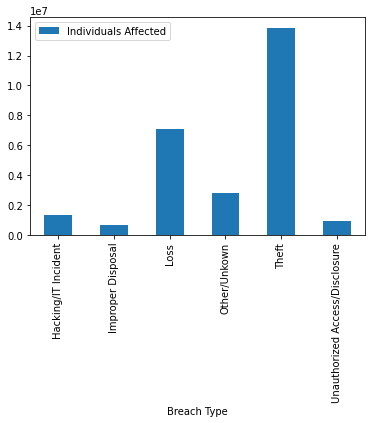

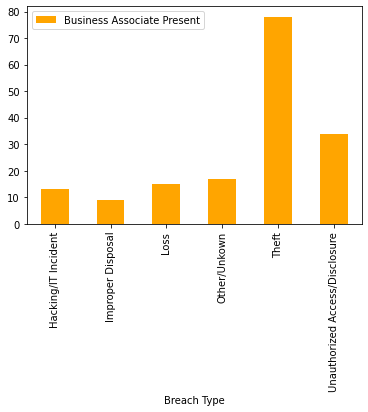

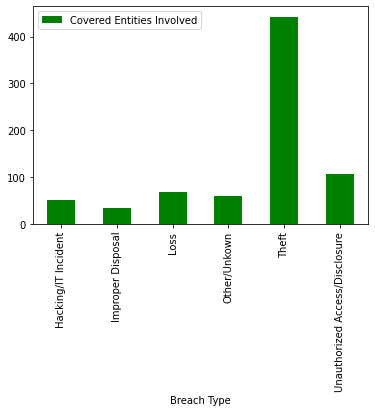

In [52]:
tob = df1.groupby(['Breach Type']).sum()
tob.plot(kind = 'bar', y='Individuals Affected')
tob.plot(kind = 'bar', y='Business Associate Present', color='orange')
tob.plot(kind = 'bar', y='Covered Entities Involved', color = 'green')

In [62]:
df2 = df1.groupby(['Breach Type']).sum()
df3 = df2.apply(lambda x:100 * x / float(x.sum()))
df3.head()

,Individuals Affected,Business Associate Present,Covered Entities Involved
Breach Type,,,
Hacking/IT Incident,5.037624,7.831325,6.824147
Improper Disposal,2.416006,5.421687,4.593176
Loss,26.638359,9.036145,8.923885
Other/Unkown,10.432513,10.240964,7.742782
Theft,51.960951,46.987952,58.005249


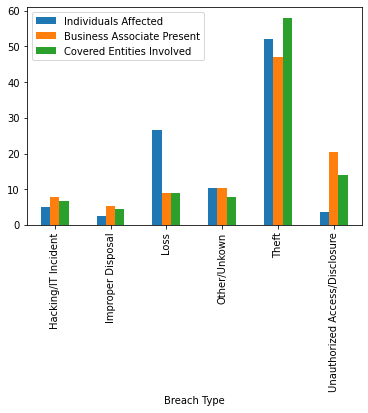

In [63]:
df3.plot(kind = 'bar')

In [64]:
df2 = df1.groupby(['Location']).sum()
df4 = df2.apply(lambda x:100 * x / float(x.sum()))
df4.head()

,Individuals Affected,Business Associate Present,Covered Entities Involved
Location,,,
Desktop Computers,24.794681,7.228916,15.354331
E-mail,1.251109,1.204819,3.543307
Electronic health records,10.101449,1.807229,3.280840
Laptops,10.102889,16.867470,23.622047
Network Servers,7.045401,14.457831,9.055118


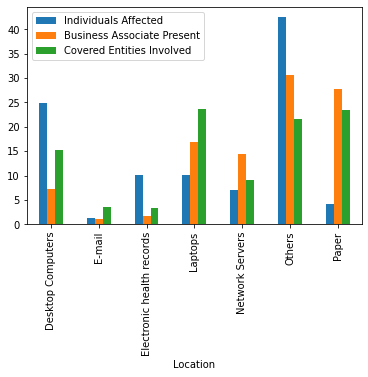

In [65]:
df4.plot(kind = 'bar')

In [74]:
df2 = df1.groupby(['State']).sum()
df5 = df2.apply(lambda x:100 * x / float(x.sum()))
df5.nlargest(10, 'Individuals Affected')

,Individuals Affected,Business Associate Present,Covered Entities Involved
State,,,
VA,18.874620,3.614458,1.968504
IL,16.239934,7.228916,4.986877
FL,10.475510,0.602410,6.561680
NY,9.174443,6.024096,6.036745
NJ,6.658763,3.012048,1.049869
CA,4.830584,10.240964,10.761155
PA,4.355416,6.024096,3.674541
TN,4.249482,1.807229,2.755906
AL,3.702134,0.602410,1.049869


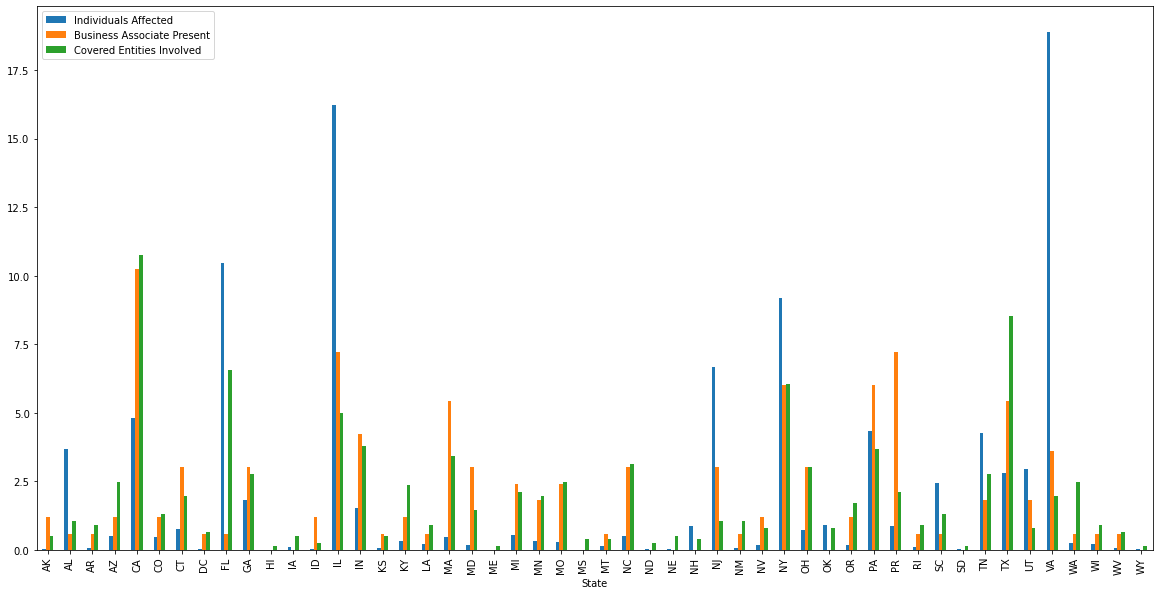

In [72]:
df5.plot(kind = 'bar', figsize = (20,10))